## Yahia Chammami

# **STACKING GENERALIZATION**


Stacked Generalization or **“Stacking”** for short is an ensemble machine learning algorithm.

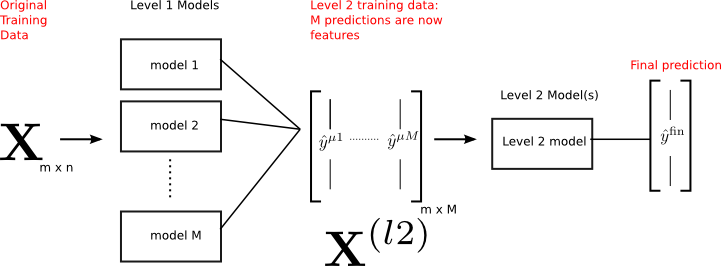




The architecture of a stacking model involves two or more base models, often referred to as **level-1** models, and a **meta-model** that combines the predictions of the base models, referred to as a level-1 model.

**Level-1 Models (Base-Models)**: Models fit on the training data and whose predictions are compiled.

**Level-2 Model (Meta-Model)**: Model that learns how to best combine the predictions of the base models.

The meta-model is trained on the predictions made by base models on out-of-sample data. That is, data not used to train the base models is fed to the base models, predictions are made, and these predictions, along with the expected outputs, provide the input and output pairs of the training dataset used to fit the meta-model.

The outputs from the base models used as input to the meta-model may be real value in the case of regression, and probability values, probability like values, or class labels in the case of classification.



**Base-Models**: Use a diverse range of models that make different assumptions about the prediction task.Like: Decision Tree, SVM,Neural Networks etc...

**Meta-model**: is often simple, providing a smooth interpretation of the predictions made by the base models. As such, linear models are often used as the meta-model, such as linear regression for regression tasks (predicting a numeric value) and logistic regression for classification tasks (predicting a class label).






# **Implementation**

In [26]:
#importing the required libraries
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot

In [27]:
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    return X, y

In [28]:
# get a stacking ensemble of models
def get_stacking():
    # Define the base models
    level1 = list()
    level1.append(('lr', LogisticRegression()))
    level1.append(('knn', KNeighborsClassifier()))
    level1.append(('cart', DecisionTreeClassifier()))
    level1.append(('svm', SVC()))
    level1.append(('bayes', GaussianNB()))

    # Define the meta learner model
    level2 = LogisticRegression()

    # Define the stacking ensemble
    model = StackingClassifier(estimators=level1, final_estimator=level2, cv=5)

    return model

In [29]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()  # Assuming you have already defined the get_stacking function
    
    return models

In [30]:
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

>lr 0.866 (0.029)
>knn 0.931 (0.025)
>cart 0.823 (0.038)
>svm 0.957 (0.020)
>bayes 0.833 (0.031)
>stacking 0.964 (0.019)


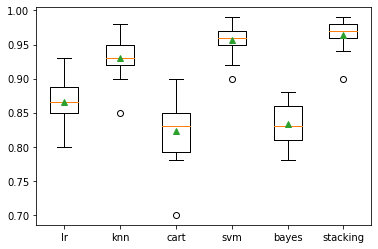

In [31]:
# define dataset
X, y = get_dataset()
models = get_models()

results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()